Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

Нарисуйте график распределения показов на объявление за весь период.

А теперь давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем.

*Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия.

*Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

*Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

*Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

*А теперь давайте выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

**В** этот раз у нас ядрёный датасэт о рекламах

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (те, кто разместил эти объявления).

**ads_data.csv – данные взаимодействий с рекламными объявлениями**

date – дата

time – время

event – действие (просмотр/клик)

platform – платформа

ad_id – id объявления

client_union_id – id рекламного кабинета

campaign_union_id – id рекламной кампании

ad_cost_type – тип оплаты

ad_cost – цена

has_video – есть ли видео

target_audience_count – размер аудитории

**ads_clients_data.csv – характеристики рекламных клиентов**

date – дата

client_union_id – id рекламного кабинета

community_id – id сообщества

create_date – дата создания рекламного клиента

In [ ]:
import pandas as pd
from zipfile import ZipFile

In [ ]:
# Укажите путь к вашему архиву
ads_arhive = '/content/ads.zip'

# Извлекаем файлы из архива, r - значит в режиме чтения
with ZipFile(ads_arhive, 'r') as ads:

    # Чтение файлов и запись данных в переменные DataFrame
    with ads.open('ads_clients_data.csv') as file1, ads.open('ads_data.csv') as file2:

        # Считываем данные в переменные Pandas DataFrame
        df1 = pd.read_csv(file1)
        df2 = pd.read_csv(file2)

# Теперь df1 и df2 содержат данные из соответствующих файлов в архиве


In [ ]:
df2

In [ ]:
df1

**Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).**


In [ ]:
number_per_and_per_event = df2.groupby(['ad_id', 'event'], as_index = False).agg({'date' : 'count'}).rename(columns = {'date' : 'count_sobitiy'})
number_per_and_per_event

,ad_id,event,count_sobitiy
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


Надо взять все обьявления и посчитать среднее для каждого event

Чтобы это сделать надо сложить все count_sibitiy и разделить их на число обьявлений которые есть.

In [ ]:
pivot_per = number_per_and_per_event \
                        .pivot(index = 'ad_id',
                              columns = 'event',
                              values = 'count_sobitiy') \
                        .fillna(0)

pivot_per

#Необходимо заполнить пропуски нулями иначе результат будет не правильный

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [ ]:
pivot_per.mean().round()

event
click    113.0
view     923.0
dtype: float64

In [ ]:
#Проверка
pivot_per.reset_index().count()

event
ad_id    965
click    965
view     965
dtype: int64

In [ ]:
pivot_per.click.sum()

109178.0

In [ ]:
pivot_per.view.sum()

890822.0

In [ ]:
109178.0 / 965


113.1378238341969

In [ ]:
890822.0 / 965

#Конец проверки

923.1316062176165

In [ ]:
#VAR2
number_per_and_per_event.groupby('event').agg({'count_sobitiy' : 'sum'})

,count_sobitiy
event,
click,109178
view,890822


In [ ]:
number_per_and_per_event.ad_id.nunique()

965


**Нарисуйте график распределения показов на объявление за весь период.**

по x - число показов

по y - доля обьявлений с такими показами

In [ ]:
number_per_and_per_event.query('event == "view"').query('count_sobitiy == 101')
#Тоесть для 5-ти обьявлений будет 101 показ, для этого можно потроить гистрограмму.

In [ ]:
views_per_ad = number_per_and_per_event.query('event == "view"')
views_per_ad

In [ ]:
import seaborn as sns
import numpy as np
#pandas базируется на numpy

In [ ]:
sns.set(
    font_scale =2, #размер шрифта
    style      ="whitegrid", #общий вид графиков
    rc         ={'figure.figsize':(20,7)} #размер фигуры
)

In [ ]:
views_per_ad['log_count_sobitiy'] = np.log(views_per_ad.count_sobitiy)
#прологарифмируем, так как числа большие и график строится некорректно

In [ ]:
views_per_ad

,ad_id,event,count_sobitiy,log_count_sobitiy
1,2,view,101,4.615121
3,3,view,184,5.214936
5,1902,view,41,3.713572
6,2064,view,35,3.555348
8,2132,view,58,4.060443
...,...,...,...,...
1475,122004,view,100,4.605170
1476,122013,view,156,5.049856
1477,122023,view,68,4.219508
1479,122031,view,138,4.927254


<Axes: xlabel='log_count_sobitiy', ylabel='Count'>

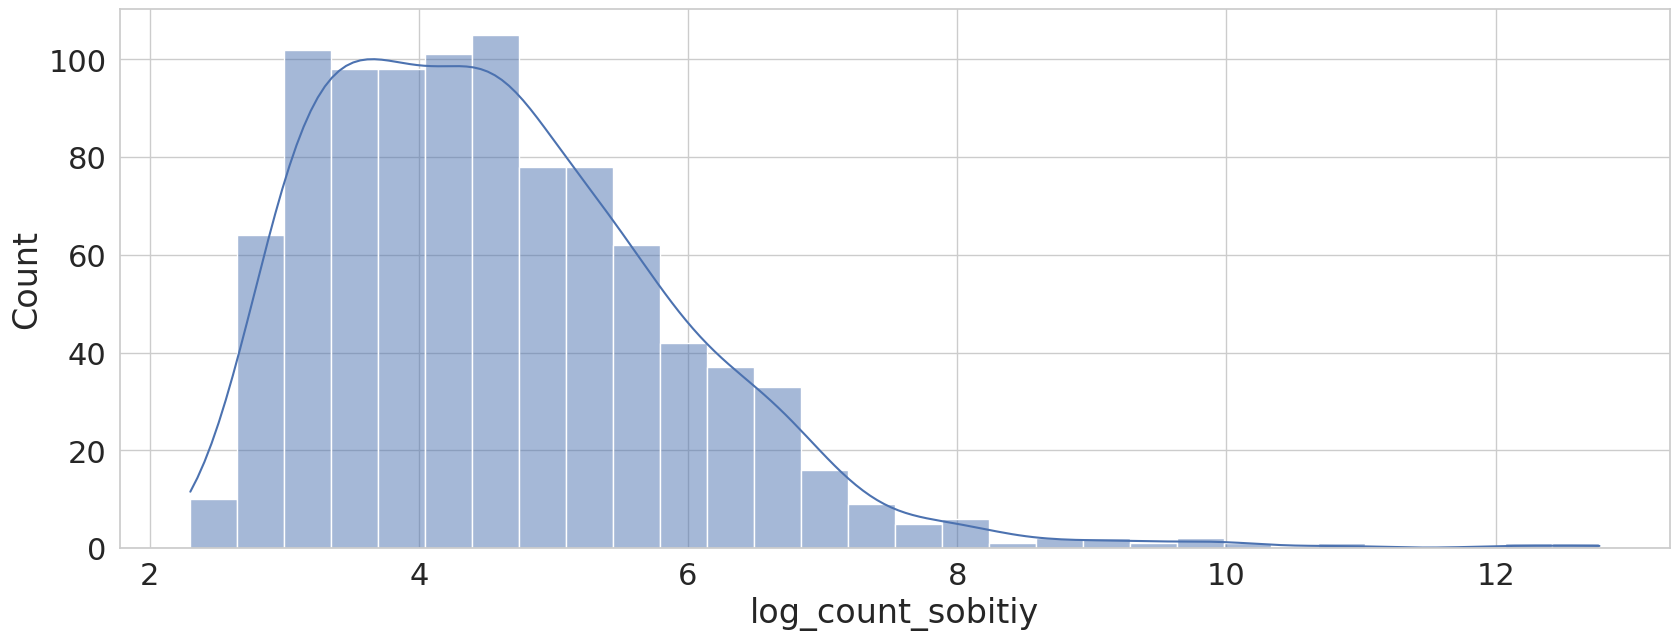

In [ ]:
sns.histplot(data=views_per_ad, x="log_count_sobitiy", kde=True)

In [ ]:
views_per_ad.count_sobitiy.max()

351802

**А теперь давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?**

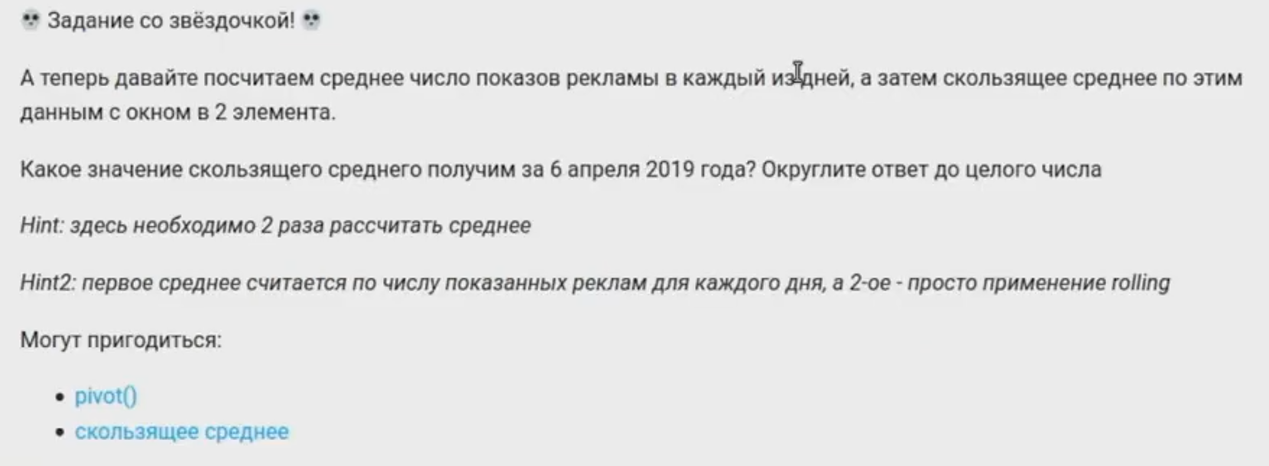

In [ ]:
ads_filter_data = df2.query('event == "view"').pivot_table(index = 'ad_id', columns = 'date', values = 'time', aggfunc = 'count')
ads_filter_data

In [ ]:
#Среднее
mean_views = ads_filter_data.mean()
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [ ]:
#Скользящее среднее
rolling_mean_views = ads_filter_data.mean().rolling(2).mean()
rolling_mean_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [ ]:
rolling_mean_views['2019-04-06'].round()

598.0

**Скользящее среднее часто используется для поиска аномалий в данных.**

**Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов.**

**В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем.**

In [ ]:
ax = rolling_mean_views
ax

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [ ]:
ax2 = mean_views
ax2

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

<Axes: xlabel='date'>

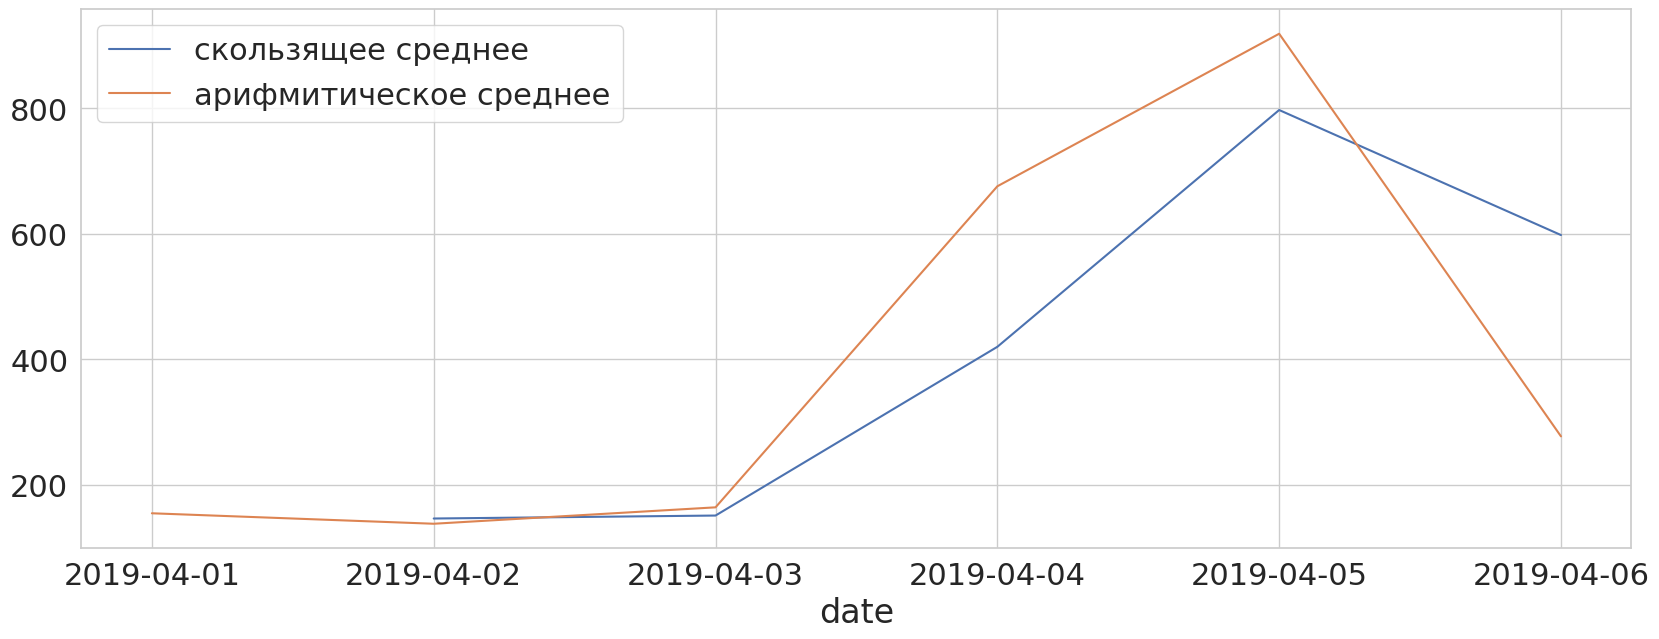

In [ ]:
sns.lineplot(data = ax, label = 'скользящее среднее')
sns.lineplot(data = ax2, label = 'арифмитическое среднее')


In [ ]:
#Определим разницу
raznica = (mean_views - rolling_mean_views).abs()
raznica.idxmax()

'2019-04-06'

In [ ]:
#2-й способ с помощью метода subtract
mean_views.subtract(rolling_mean_views).abs().idxmax()

'2019-04-06'

**Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия.**

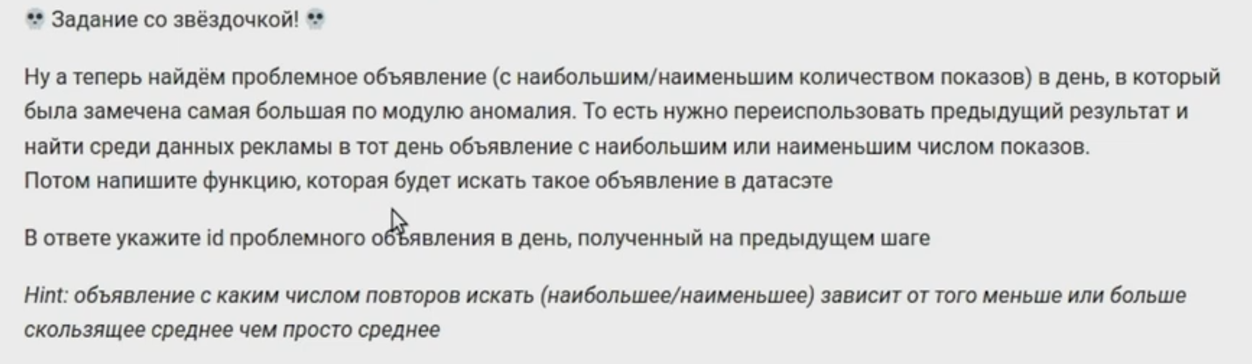

In [ ]:
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [ ]:
#Извлекаем дату с аномалией
anomaly_day = mean_views.subtract(rolling_mean_views).abs().idxmax()
anomaly_day

'2019-04-06'

In [ ]:
#Определим знак аномалии
defference_value = mean_views.subtract(rolling_mean_views)[anomaly_day]

if defference_value <= 0:
  #тогда ищем максимум
  anomaly_ad = ads_filter_data[anomaly_day].idxmax()
else:
  #тогда ищем минимум
  anomaly_ad = ads_filter_data[anomaly_day].idxmin()


In [ ]:
anomaly_ad

112583

In [ ]:
ads_filter_data['2019-04-06'].max()

48991.0

In [ ]:
ads_filter_data['2019-04-06'].min()

1.0

In [ ]:
#Сделаем функцию
def find_anomaly_id(f):
  mean_views = f.mean()
  mean_views.subtract(rolling_mean_views).abs().idxmax()
  #Определим знак аномалии
  defference_value = mean_views.subtract(rolling_mean_views)[anomaly_day]

  if defference_value <= 0:
  #тогда ищем максимум
    anomaly_ad = f[anomaly_day].idxmax()
  else:
  #тогда ищем минимум
    anomaly_ad = f[anomaly_day].idxmin()
  return anomaly_ad


In [ ]:
find_anomaly_id(ads_filter_data)

112583

In [ ]:
#Рефакторинг(нормальное название переменных, оптимизация кода, удаление не нужных кусков и тд) кода, те улучшим.

**Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.**


In [ ]:
df1

In [ ]:
full_data = df2.merge(df1.drop(columns = ['date', 'community_id'] ))
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [ ]:
full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime )

In [ ]:
full_data.groupby('client_union_id').apply(lambda group: (group.date - group.create_date).min()).mean()


Timedelta('124 days 09:04:43.532219570')

**Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))**


In [ ]:
threshold = pd.to_timedelta('365d')
threshold

Timedelta('365 days 00:00:00')

In [ ]:
#Коверсия количество пользователей которые воспользовались нашим продуктом
#В нашем случае конверсия это отношение клиентов которые запустили рекламу ко всем клиентам
creation_difference = full_data.groupby('client_union_id').apply(lambda group: (group.date - group.create_date).min())
creation_difference

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [ ]:
#Пользователи которые создали рекламу менее чем спустя год после регестрации
creation_difference = creation_difference.loc[creation_difference < threshold]

In [ ]:
#В этой табличке все клиенты которые создали рекламу
df1

In [ ]:
#Число уникальных клиентов
df1.client_union_id.nunique()

122078

In [ ]:
round(creation_difference.shape[0] / df1.client_union_id.nunique() * 100, 2)

0.69


**Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]**


In [ ]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit ='d')
bins

TimedeltaIndex(['0 days', '30 days', '90 days', '180 days', '365 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
creation_difference_groups = pd.cut(creation_difference, bins = bins,
       labels = ['0-30', '30-90', '90-180', '180-365']).value_counts()
creation_difference_groups

90-180     396
30-90      263
180-365    168
0-30        11
dtype: int64


**А теперь давайте выведем на интерактивный график эти категории с количеством уникальных клиентов в них.**

In [ ]:
import plotly.express as px

In [ ]:
px.bar(creation_difference_groups)